<a href="https://colab.research.google.com/github/FadillahMuhesa/Memprediksi-Faktor-Penyebab-Pelanggan-Berhenti-Menyewa-Unit-Rusunawa-Menggunakan-SVM/blob/main/svm_kp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Library**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import datasets ## Get dataset from sklearn
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import numpy.random as nr
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.svm import SVC

%matplotlib inline

### **Data Undertanding(Mendefinisikan Data)**

In [ ]:
data = pd.read_csv('kp.csv')
data

,NO,NAMA,NO UNIT,GENDER,UMUR,JUMLAH ANGGOTA,ASAL,PEKERJAAN,PENGHASILAN,NO.STS,...,PEMBAYARAAN BULAN,NOMINAL RUPIAH,KETERANGAN PEMBAYARAN,DaysLate,ALAMAT,SUMBER,TAHUN PAJAK,BULAN PAJAK,METODE,CHURN
0,1,MASNAH,1,WANITA,30,3,Bandar Lampung,Wiraswasta,450000,01/01/23,...,DESEMBER,"Rp153,00",Menunggak,30,JL. RE. Martadinata Rumah Susun Lk.II Rt.009 K...,RETRIBUSI,2023,JANUARI,tagihan tidak langsung,0
1,2,SUSANTO,9,PRIA,38,3,Bandar Lampung,Buruh,340000,01/01/23,...,DESEMBER,"Rp153,00",Menunggak,30,JL. RE. Martadinata Rumah Susun Lk.II Rt.009 K...,RETRIBUSI,2023,JANUARI,tagihan tidak langsung,0
2,3,BACHRI,3,PRIA,28,2,lampung tengah,Buruh,650000,01/01/23,...,DESEMBER,"Rp153,00",Menunggak,30,JL. RE. Martadinata Rumah Susun Lk.II Rt.009 K...,RETRIBUSI,2023,JANUARI,tagihan tidak langsung,0
3,4,NIKO HENDRI PERMANA,58,PRIA,43,4,Bandar Lampung,Buruh,652000,01/01/23,...,DESEMBER,"Rp153,00",Menunggak,30,Jl. KP. Garuntang Lk. II Rt.002 Kel. Ketapang ...,RETRIBUSI,2023,JANUARI,tagihan tidak langsung,0
4,5,SUMARNO,70,PRIA,39,3,Lampung Selatan,Sopir/Pengemudi,590000,01/01/23,...,DESEMBER,"Rp153,00",Menunggak,30,Jl. KP. Garuntang Lk. II Rt.002 Kel. Ketapang ...,RETRIBUSI,2023,JANUARI,tagihan langsung,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,1380,HARYANTO,30,PRIA,35,2,Bandar Lampung,Sopir/Pengemudi,950000,31/08/23,...,AGUSTUS,"Rp150,00",Tepat Waktu,0,"Jln. Hi. Sulaiman 2, Komplek Rusunawa Keteguha...",RETRIBUSI,2023,AGUSTUS,tagihan langsung,0
1380,1381,MAULANA,66,PRIA,30,4,Lampung Timur,Sopir/Pengemudi,815000,31/08/23,...,AGUSTUS,"Rp150,00",Tepat Waktu,0,"Jln. Hi. Sulaiman 2, Komplek Rusunawa Keteguha...",RETRIBUSI,2023,AGUSTUS,tagihan tidak langsung,0
1381,1382,ARYADI,18,PRIA,32,2,Lampung Selatan,Pedagang,650000,31/08/23,...,AGUSTUS,"Rp150,00",Tepat Waktu,0,"Jln. Hi. Sulaiman 2, Komplek Rusunawa Keteguha...",RETRIBUSI,2023,AGUSTUS,tagihan tidak langsung,0
1382,1383,ROMIWAN,75,PRIA,36,2,Lampung Timur,Buruh,400000,31/08/23,...,AGUSTUS,"Rp150,00",Tepat Waktu,0,"Jln. Hi. Sulaiman 2, Komplek Rusunawa Keteguha...",RETRIBUSI,2023,AGUSTUS,tagihan langsung,0


In [ ]:
data.shape

(1384, 26)

## **Data Preprocessing**

###Proses yang dilakukan

1.   Menghapus Variabel yang tidak digunakan dan menyisakan variabel yang digunakan seperti: no unit, gender, umur, jumlah anggota, penghasilan, Dayslate, alamat, dan churn(keterangan masih menyewa unit atau tidak)
2.   Mengecek missing value
3.   Mengubah tipe data object menjadi integer

In [ ]:
# Membaca dataset
df = pd.read_csv('kp.csv')

# Memilih kolom yang ingin disertakan dalam subset
kolom_yang_disertakan = ['GENDER', 'UMUR', 'JUMLAH ANGGOTA', 'PENGHASILAN', 'DaysLate', 'ALAMAT', 'CHURN']
data_subset = data[kolom_yang_disertakan]

# Menampilkan subset data
print(data_subset)

      GENDER  UMUR  JUMLAH ANGGOTA  PENGHASILAN  DaysLate  \
0     WANITA    30               3       450000        30   
1       PRIA    38               3       340000        30   
2       PRIA    28               2       650000        30   
3       PRIA    43               4       652000        30   
4       PRIA    39               3       590000        30   
...      ...   ...             ...          ...       ...   
1379    PRIA    35               2       950000         0   
1380    PRIA    30               4       815000         0   
1381    PRIA    32               2       650000         0   
1382    PRIA    36               2       400000         0   
1383  WANITA    28               3       600000         0   

                                                 ALAMAT  CHURN  
0     JL. RE. Martadinata Rumah Susun Lk.II Rt.009 K...      0  
1     JL. RE. Martadinata Rumah Susun Lk.II Rt.009 K...      0  
2     JL. RE. Martadinata Rumah Susun Lk.II Rt.009 K...      0  
3     J

In [ ]:
data_subset.shape

(1384, 7)

In [ ]:
data_subset.isnull().sum()

GENDER            0
UMUR              0
JUMLAH ANGGOTA    0
PENGHASILAN       0
DaysLate          0
ALAMAT            0
CHURN             0
dtype: int64

isnull adalah salah satu fungsi atau metode yang digunakan dalam pemrograman untuk memeriksa apakah suatu nilai atau elemen dalam struktur data (seperti DataFrame dalam pandas di Python) terdapat nilai nol atau missing value(kosong).  dari hasil diatas, dataset yang digunakan tidak terdapat missing value.

Mengubah Tipe Data + Encoder

In [ ]:
le=LabelEncoder()
data_subset['ALAMAT'] = LabelEncoder().fit_transform(data_subset['ALAMAT'])
data_subset['GENDER'] = LabelEncoder().fit_transform(data_subset['GENDER'])

<ipython-input-8-3ef465709fb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['ALAMAT'] = LabelEncoder().fit_transform(data_subset['ALAMAT'])
<ipython-input-8-3ef465709fb9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['GENDER'] = LabelEncoder().fit_transform(data_subset['GENDER'])


In [ ]:
data_subset['GENDER'].value_counts()

0    1204
1     180
Name: GENDER, dtype: int64

In [ ]:
data_subset['ALAMAT'].value_counts()

2    674
1    639
0     71
Name: ALAMAT, dtype: int64

In [ ]:
df = data_subset.copy()

df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)

Duplicated values dropped succesfully
****************************************************************************************************


### **Exploratory Data Analysis (EDA)**

In [ ]:
data_subset.shape

(1384, 7)

In [ ]:
data_subset.head()

,GENDER,UMUR,JUMLAH ANGGOTA,PENGHASILAN,DaysLate,ALAMAT,CHURN
0,1,30,3,450000,30,0,0
1,0,38,3,340000,30,0,0
2,0,28,2,650000,30,0,0
3,0,43,4,652000,30,1,0
4,0,39,3,590000,30,1,0


In [ ]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   GENDER          1384 non-null   int64
 1   UMUR            1384 non-null   int64
 2   JUMLAH ANGGOTA  1384 non-null   int64
 3   PENGHASILAN     1384 non-null   int64
 4   DaysLate        1384 non-null   int64
 5   ALAMAT          1384 non-null   int64
 6   CHURN           1384 non-null   int64
dtypes: int64(7)
memory usage: 75.8 KB


In [ ]:
#melihat nama kolom dataframe
#melihat nama kolom untuk memeriksa spasi awal dan akhir
data_subset.columns.values

array(['GENDER', 'UMUR', 'JUMLAH ANGGOTA', 'PENGHASILAN', 'DaysLate',
       'ALAMAT', 'CHURN'], dtype=object)

In [ ]:
data_subset.dtypes #melihat tipe data subset

GENDER            int64
UMUR              int64
JUMLAH ANGGOTA    int64
PENGHASILAN       int64
DaysLate          int64
ALAMAT            int64
CHURN             int64
dtype: object

In [ ]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   GENDER          1384 non-null   int64
 1   UMUR            1384 non-null   int64
 2   JUMLAH ANGGOTA  1384 non-null   int64
 3   PENGHASILAN     1384 non-null   int64
 4   DaysLate        1384 non-null   int64
 5   ALAMAT          1384 non-null   int64
 6   CHURN           1384 non-null   int64
dtypes: int64(7)
memory usage: 75.8 KB


Dapat dilihat bahwa tidak ada nilai yang hilang dalam dataset dan semua variabel merupakan variabel integer.

Variabel target adalah kolom churn. Jadi, saya akan memeriksa distribusinya.

In [ ]:
#check distribution of churn column

data_subset['CHURN'].value_counts()

0    1339
1      45
Name: CHURN, dtype: int64

In [ ]:
# view the percentage distribution of CHURN column
data_subset['CHURN'].value_counts()/np.float(len(data_subset))

<ipython-input-28-a9e8a7ae5f21>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_subset['CHURN'].value_counts()/np.float(len(data_subset))


0    0.967486
1    0.032514
Name: CHURN, dtype: float64

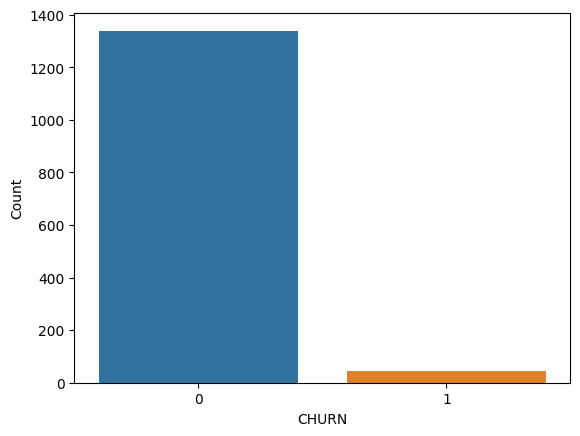

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_subset is your DataFrame

# Create the count plot
sns.countplot(data=data_subset, x='CHURN', label="Count")

# Set the ylabel
plt.ylabel('Count')

# Show the plot
plt.show()


Terlihat persentase observasi pada kelas label 0 dan 1 adalah 96,74% dan 3,25%. Jadi, ini adalah masalah ketidakseimbangan kelas. Maka akan dibahas pada bagian selanjutnya.

In [ ]:
data_subset['GENDER'].value_counts()

0    1204
1     180
Name: GENDER, dtype: int64

In [ ]:
data_subset['CHURN'].value_counts()

0    1339
1      45
Name: CHURN, dtype: int64

In [ ]:
data_subset['JUMLAH ANGGOTA'].value_counts()

3    554
2    398
4    300
5     86
1     39
6      7
Name: JUMLAH ANGGOTA, dtype: int64

In [ ]:
data_subset['DaysLate'].value_counts()

0     531
7     104
30     65
3      57
2      50
1      47
14     46
10     44
16     44
6      44
5      42
4      40
17     40
13     39
12     39
8      37
15     35
9      29
11     25
18      9
19      9
20      8
Name: DaysLate, dtype: int64

##Outliers in numerical variables

In [ ]:
data_subset.describe().T

,count,mean,std,min,25%,50%,75%,max
GENDER,1384.0,0.130058,0.336489,0.0,0.0,0.0,0.0,1.0
UMUR,1384.0,39.994220,7.354565,3.0,35.0,39.0,45.0,60.0
JUMLAH ANGGOTA,1384.0,3.012283,0.954796,1.0,2.0,3.0,4.0,6.0
PENGHASILAN,1384.0,769016.618497,225191.462874,340000.0,600000.0,750000.0,895000.0,1500000.0
DaysLate,1384.0,6.447254,7.771602,0.0,0.0,4.0,11.0,30.0
ALAMAT,1384.0,1.435694,0.590523,0.0,1.0,1.0,2.0,2.0
CHURN,1384.0,0.032514,0.177426,0.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
# scaler=PowerTransformer()
# scaler=StandardScaler()
scaler.fit(data_subset.drop('CHURN',axis=1))
scaled_features=scaler.transform(data_subset.drop('CHURN',axis=1))
df_feat=pd.DataFrame(scaled_features,columns=data_subset.columns[:-1])

df_feat.head()

,GENDER,UMUR,JUMLAH ANGGOTA,PENGHASILAN,DaysLate,ALAMAT
0,1.0,0.473684,0.4,0.094828,1.0,0.0
1,0.0,0.614035,0.4,0.000000,1.0,0.0
2,0.0,0.438596,0.2,0.267241,1.0,0.0
3,0.0,0.701754,0.6,0.268966,1.0,0.5
4,0.0,0.631579,0.4,0.215517,1.0,0.5


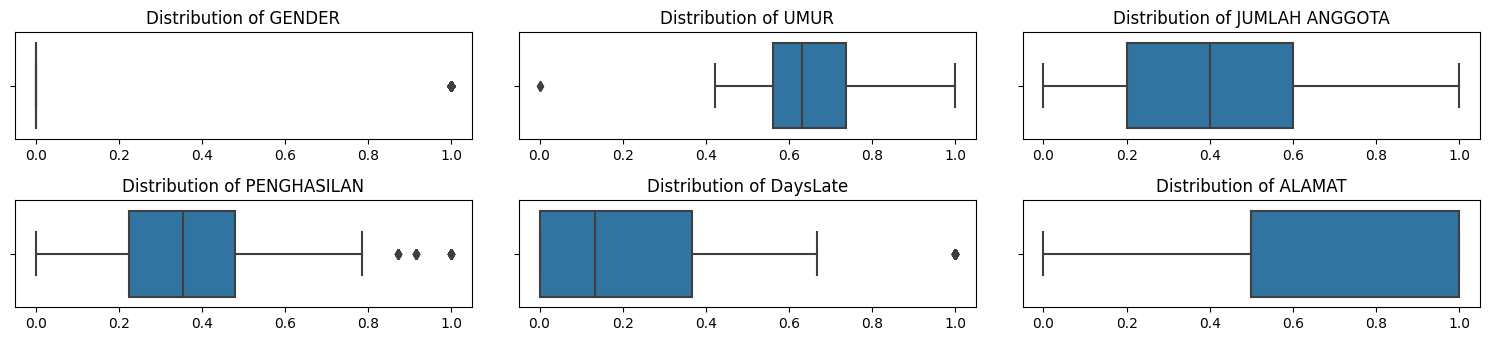

In [ ]:
fig = plt.figure(figsize=(15, 10)) # sets the size of the 4 plot with width as 10 and height as 10
for i,columns in enumerate(df_feat.columns, 1):
    ax = plt.subplot(6,3,i) # creates 3 subplots in one single row
    sns.boxplot(data = df_feat, x=df_feat[columns]) # creates box plots for each feature in df_cont dataset
    ax.set_xlabel(None) # removes the labels on x-axis
    ax.set_title(f'Distribution of {columns}') # adds a title to each subplot
    plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show()

boxplot di atas mengonfirmasi bahwa outlier yang dimiliki masing masing variabel tidak banyak

##Check the distribution of variables

Sekarang, saya akan memplot histogram untuk memeriksa distribusi guna mengetahui apakah normal atau miring.

array([[<Axes: title={'center': 'GENDER'}>,
        <Axes: title={'center': 'UMUR'}>,
        <Axes: title={'center': 'JUMLAH ANGGOTA'}>],
       [<Axes: title={'center': 'PENGHASILAN'}>,
        <Axes: title={'center': 'DaysLate'}>,
        <Axes: title={'center': 'ALAMAT'}>],
       [<Axes: title={'center': 'CHURN'}>, <Axes: >, <Axes: >]],
      dtype=object)

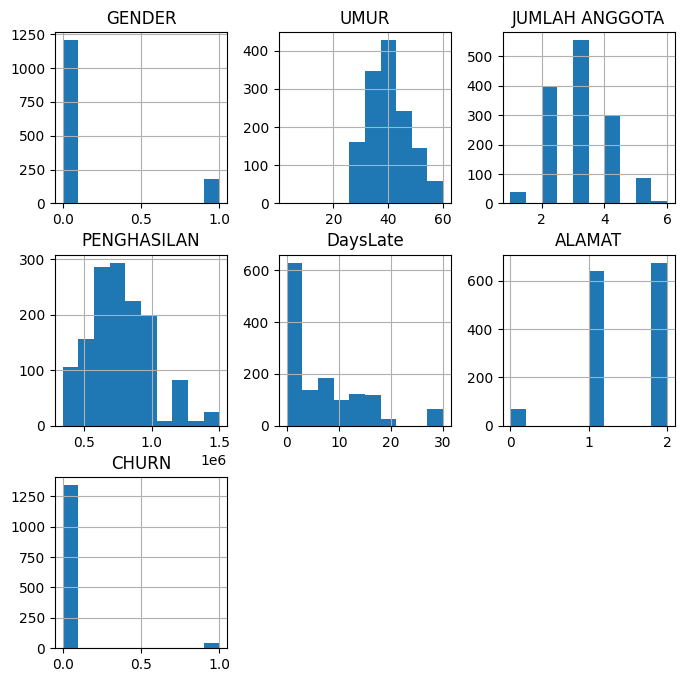

In [ ]:
#buat plot hist untuk masing masing kolom
data_subset.hist(figsize=(8,8))

<Axes: >

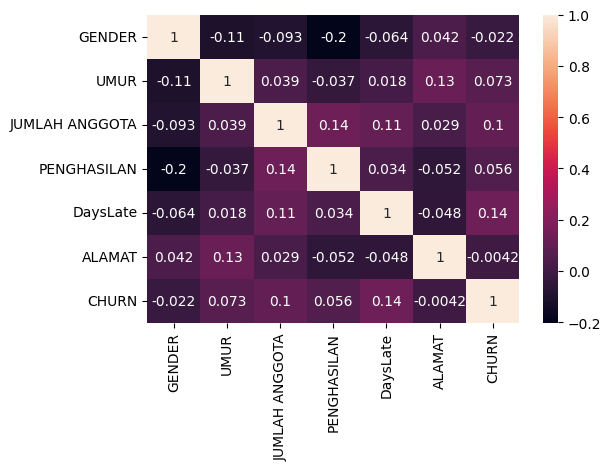

In [ ]:
data_subset.corr()
corr = data_subset.corr()
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(corr, annot=True, ax=ax)

In [ ]:
##harusnya ada pengecekan data yang hilang disini

Dengan menggunakan matriks ini kita dapat dengan cepat menemukan pola hilangnya dataset.

Dari visualisasi di atas kita dapat mengamati bahwa tidak ada pola khas yang menonjol. Sebenarnya tidak ada data yang hilang.

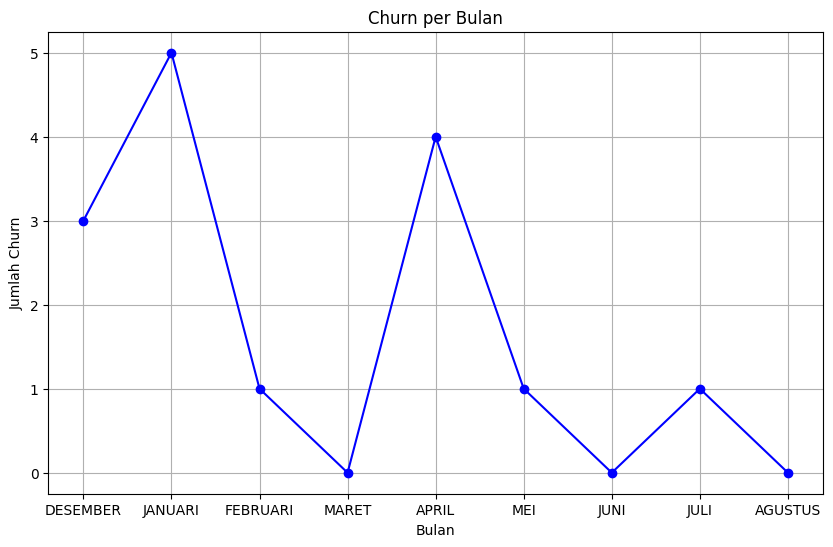

In [ ]:
#menampilkan churn perbulan
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data churn per bulan (contoh data)
data = pd.DataFrame({'PEMBAYARAAN BULAN': ['DESEMBER', 'JANUARI', 'FEBRUARI', 'MARET', 'APRIL', 'MEI', 'JUNI', 'JULI', 'AGUSTUS'],
                     'CHURN': [3, 5, 1, 0, 4, 1, 0, 1, 0]})

# Membuat plot churn per bulan
plt.figure(figsize=(10, 6))
plt.plot(data['PEMBAYARAAN BULAN'], data['CHURN'], marker='o', linestyle='-', color='b')
plt.title('Churn per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Churn')
plt.grid(True)
plt.show()

##Declare feature vector and target variable

In [ ]:
X = data_subset.drop(['CHURN'], axis=1)

y = data_subset['CHURN']

##Split data into separate training and test set

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1038, 6), (346, 6))

##Feature Scaling

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

,GENDER,UMUR,JUMLAH ANGGOTA,PENGHASILAN,DaysLate,ALAMAT
count,1.038000e+03,1.038000e+03,1.038000e+03,1.038000e+03,1.038000e+03,1.038000e+03
mean,-4.535015e-17,1.095249e-16,-1.317721e-16,-1.232155e-16,-6.160775e-17,-1.608647e-16
std,1.000482e+00,1.000482e+00,1.000482e+00,1.000482e+00,1.000482e+00,1.000482e+00
min,-3.997206e-01,-5.004596e+00,-2.125730e+00,-1.907621e+00,-8.192870e-01,-2.423736e+00
25%,-3.997206e-01,-6.888823e-01,-1.066945e+00,-7.049866e-01,-8.192870e-01,-7.386471e-01
50%,-3.997206e-01,-1.494181e-01,-8.160190e-03,-8.139858e-02,-4.253309e-01,-7.386471e-01
75%,-3.997206e-01,6.597783e-01,1.050624e+00,5.588927e-01,6.252187e-01,9.464423e-01
max,2.501748e+00,2.682769e+00,3.168194e+00,3.259252e+00,3.120274e+00,9.464423e-01


### **Data Processing**

In [ ]:
# from sklearn.model_selection import train_test_split
# training_data, testing_data = train_test_split(df, test_size=0.3, random_state=25)

In [ ]:
data_subset['ALAMAT']. value_counts()

2    674
1    639
0     71
Name: ALAMAT, dtype: int64

In [ ]:
data_subset['DaysLate']. value_counts()

0     531
7     104
30     65
3      57
2      50
1      47
14     46
10     44
16     44
6      44
5      42
4      40
17     40
13     39
12     39
8      37
15     35
9      29
11     25
18      9
19      9
20      8
Name: DaysLate, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
ros = RandomOverSampler(random_state=42)

In [ ]:
# fit and apply the transform
X_over, y_over = ros.fit_resample(X_train, y_train)

In [ ]:
print('Genuine:', y_over.value_counts()[0], '/', round(y_over.value_counts()[0]/len(y_over) * 100,2), '% of the dataset')
print('Frauds:', y_over.value_counts()[1], '/',round(y_over.value_counts()[1]/len(y_over) * 100,2), '% of the dataset')

Genuine: 1004 / 50.0 % of the dataset
Frauds: 1004 / 50.0 % of the dataset


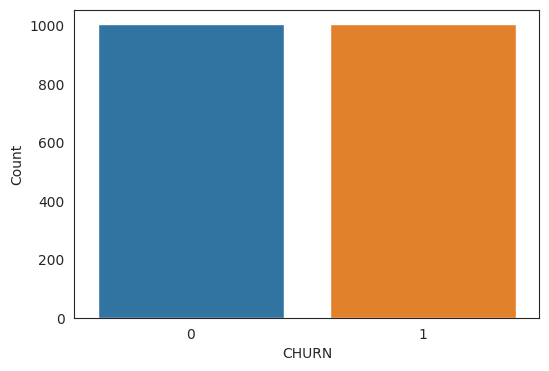

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
classes = ['0', '1']
counts = [y_over.value_counts()[0], y_over.value_counts()[1]]

# Membuat diagram batang dengan Seaborn
sns.set_style('white')
plt.figure(figsize=(6, 4))
sns.barplot(x=classes, y=counts)
plt.xlabel('CHURN')
plt.ylabel('Count')
plt.show()

### **Data Modeling**

Run SVM with default hyperparameters

SVM with kernel linear

In [ ]:
svc = SVC(kernel='linear', C=1, probability=True, gamma=1)
model=svc.fit(X_train, y_train)
y_pred_dtc=model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred_dtc)
print("Confusion Matrix: \n", cm)
simpanaccuracy_linier = accuracy_score(y_test,y_pred_dtc)
print("Accuracy: ", simpanaccuracy_linier)
simpanf1score_linier = f1_score(y_test,y_pred_dtc)
print("F1 Score: ", simpanf1score_linier)
simpan_sensitivity_linier = recall_score(y_test,y_pred_dtc)
print("Sensitivity: ", simpan_sensitivity_linier)
print(classification_report(y_test,y_pred_dtc))


plt.figure(figsize=(8,5))
axis_labels = ['0', '1']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for SVM model ---')

In [ ]:
# Menampilkan bobot fitur
feature_weights = svc.coef_
print('Bobot Fitur:')
print(feature_weights)

# Menampilkan fitur paling berpengaruh (misalnya, yang memiliki bobot tertinggi)
most_influential_features = X.columns[abs(feature_weights[0]) > 0.5]
print('Fitur Paling Berpengaruh:')
print(most_influential_features)

In [ ]:
svc2 = SVC(kernel='rbf', C=5, probability=True)
model2=svc2.fit(X_train, y_train)
y_pred_dtc2=model2.predict(X_test)

In [ ]:

cm = confusion_matrix(y_test,y_pred_dtc2)
print("Confusion Matrix: \n", cm)
simpanaccuracy_rbf = accuracy_score(y_test,y_pred_dtc2)
print("Accuracy: ", simpanaccuracy_rbf)
simpanf1score_rbf = f1_score(y_test,y_pred_dtc2)
print("F1 Score: ", simpanf1score_rbf)
simpan_sensitivity_rbf = recall_score(y_test,y_pred_dtc2)
print("Sensitivity: ", simpan_sensitivity_rbf)
print(classification_report(y_test,y_pred_dtc2))


plt.figure(figsize=(8,5))
axis_labels = ['0', '1']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for SVM model ---')

In [ ]:
#buat plot kekanan hasil accuracy, f1 score, sensitivity untuk masing masing model
plot_data = [['Linear', simpanaccuracy_linier, simpanf1score_linier, simpan_sensitivity_linier], ['RBF', simpanaccuracy_rbf, simpanf1score_rbf, simpan_sensitivity_rbf]]

plot_df = pd.DataFrame(plot_data, columns=['Model', 'Accuracy', 'F1 Score', 'Sensitivity'])

plot_df.plot(x='Model', y=['Accuracy', 'F1 Score', 'Sensitivity'], kind='bar', figsize=(10, 5), title='--- Model Comparison ---')

#['RFC', simpanaccuracy_rfc, simpanf1score_rfc, simpan_sensitivity_rfc]]

## **Hyperparameter Tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [10, 100, 1000],
              'gamma': [1, 0.01, 0.001],
              'kernel': ['rbf']}

grid = GridSearchCV(model2, param_grid, refit = True, verbose = 3)

# fitting the model for grid search
model3=grid.fit(X_train, y_train)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

In [ ]:
model3=grid.best_estimator_
y_pred_dtc3=model3.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred_dtc3))

In [ ]:
# cross validation model 3
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model3, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))